# Clustering

# Q1

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.iloc[:,:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Hierarchical

Text(0.5, 1.0, 'Ward Linkage Dendogram')

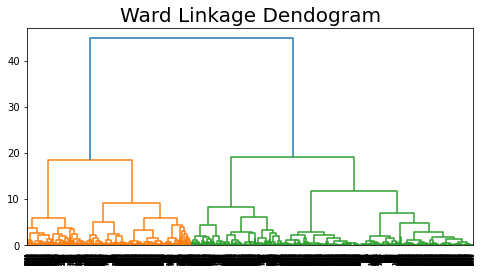

In [6]:
fig = plt.figure(figsize = (8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))
plt.title('Ward Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Single Linkage Dendogram')

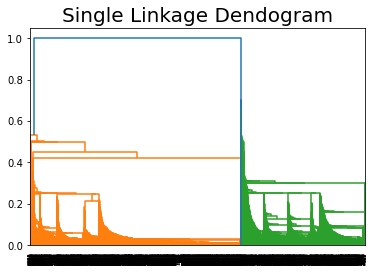

In [7]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))
plt.title('Single Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Complete Linkage Dendogram')

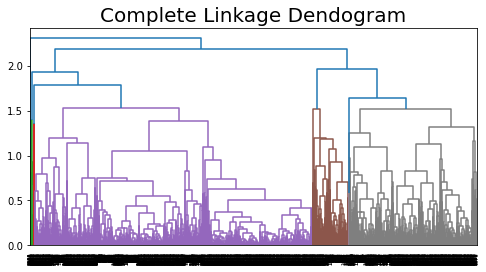

In [8]:
fig = plt.figure(figsize = (8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.title('Complete Linkage Dendogram', size = 20)

Text(0.5, 1.0, 'Complete Linkage Dendogram')

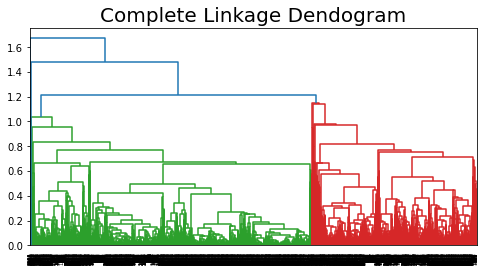

In [9]:
fig = plt.figure(figsize = (8,4))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))
plt.title('Complete Linkage Dendogram', size = 20)

In [10]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hc.fit_predict(df_norm)

array([1, 1, 1, ..., 0, 4, 4], dtype=int64)

In [11]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,3
...,...
3994,0
3995,0
3996,0
3997,4


# Kmeans

In [12]:
from sklearn.cluster import KMeans

In [13]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [14]:
df_norm = norm_func(df.iloc[:,1:])

In [15]:
model_kmeans = KMeans(n_clusters=5) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [16]:
model_kmeans.labels_

array([0, 0, 0, ..., 1, 2, 2])

In [17]:
md=pd.Series(model_kmeans.labels_)

In [18]:
df["labels"]=pd.Series(model_kmeans.labels_)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


# DBSCAN

In [19]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler

In [20]:
stscaler = StandardScaler().fit(df)
X = stscaler.transform(df)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -1.36050435e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -1.36050435e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -1.36050435e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -6.21585851e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.17332644e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.17332644e-01]])

In [21]:
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=12)

In [22]:
dbscan.labels_

array([0, 0, 0, ..., 2, 4, 4], dtype=int64)

In [23]:
db=pd.DataFrame(dbscan.labels_,columns=['cluster'])
db

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,2
3997,4


In [24]:
pd.concat([df,db],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,4


# Conclusion

From the above table, it is evident that different types of hierarchical clustering is way more complex to understand and Average Linkage is giving better result compared to other hierarchical clustering. From all the clustering methods DBSCAN Clustering also provides the better result.